# Quantum Dynamics
## Time-Dependent Schrödinger Equation

We start off with solving the time-dependent schrödinger equation by discretizing the dependent variable $x$, so we instead obtain a matrix equation as following
$$
    H^{N\times N} \Psi^{N\times 1} = i \hbar \frac{d}{dt} \Psi^{N\times 1}
$$
where the superscripts are the matrix dimension.

Then the solution to this equation can be written as 
$$
    \tag{1}
    \vec{\Psi}(t+\Delta{t}) = \mathsf{U}(\Delta{t}) \, \vec{\Psi}(t)
$$
Now if the Hamiltonian matrix $H$ is time-independent, the exact expression for the time-evolution operator is
$$
    \tag{2}
    \mathsf{U}(\Delta{t}) = e^{-i \mathsf{H}\Delta{t}/\hbar}
$$

But for small $\Delta{t}$, the time-evolution operator can be approximated with Taylor expansion of $e$ as
$$
    \mathsf{U}(\Delta{t}) \approx 1 - i\mathsf{H} \, \frac{\Delta{t}}{\hbar}
$$

or more preferably with Cayley's form,
$$
    \tag{3}
    \mathsf{U}(\Delta{t}) \approx \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    }
$$

And substituting this into the solution of the the TDSE, we get
$$
    \tag{4}
    \left( 1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t+\Delta{t}) = 
        \left( 1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t)
$$

Now we need to check that the Eq. (3) is accurate to the second order. We expand Eqs. (1) & (3) as power series in $\Delta{t}$, for the first one we have
$$
    \mathsf{U}(\Delta{t}) = 1 - i\mathsf{H} \, \frac{\Delta{t}}{\hbar}
        + \frac{1}{2} \left( i\mathsf{H} \, \frac{\Delta{t}}{\hbar} \right)^2 - \dots
$$
and for the (3)

$$
    \mathsf{U}(\Delta{t}) \approx \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } = 
    \left( 1 - \frac{i}{2} \frac{\Delta{t} \mathsf{H}}{\hbar} \right) 
        \left( 1 - \frac{i}{2} \frac{\Delta{t} \mathsf{H}}{\hbar} - \frac{1}{2} \left( \frac{\Delta{t} \mathsf{H}}{\hbar} \right)^2 + \dots \right) \\ = 
    1 - i \frac{\Delta{t} \mathsf{H}}{\hbar} - \frac{1}{2} \left( \frac{\Delta{t} \mathsf{H}}{\hbar} \right)^2 + \dots
$$

which agrees up to the $\Delta{t}^2$

Now to check that $\mathsf{U}$ is unitary matrix, by definition, we require that $\mathsf{U}\mathsf{U}^\dagger = 1$

$$
    \mathsf{U}\mathsf{U}^\dagger = \left( \frac{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } \right)
    \left( \frac{
        1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} }{
        1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H}
    } \right) = 1
$$

## Construct The Hamiltonian Matrix

We construct the the Hamiltonian matrix $\mathsf{H}$ for $N+1 =100$ spatial grid points, and the spatial boundaries with dimensionless length of $\xi = ±10$. With setting, $m=1$, $\omega=1$, and $\hbar=1$.

## Lowest Two Eigenvalues of $\mathsf{H}$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import eigh_tridiagonal, solve
from scipy.special import hermite
from scipy.integrate import quad
from scipy.misc import derivative

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf', 'svg')
plt.style.use('seaborn')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (14, 5)
}

/var/folders/wd/40rwxv7s6_57q97tnp6wq8w80000gn/T/ipykernel_19050/2536040147.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [22]:
m = omega = hbar = 1
Nx = 100
xmin = -10
xmax = 10
dx = (xmax - xmin) / (Nx + 1)

# The second derivative operator
D2 = (
    np.diag([-2] * Nx)
    + np.diag(np.ones(Nx - 1), 1)
    + np.diag(np.ones(Nx - 1), -1)
) / dx**2

# The position operator
X = np.diag(np.linspace(xmin, xmax, Nx))
X = np.diag(np.arange(xmin, xmax-dx, dx))

# The Hamiltonian
H = -0.5 / m * D2 + 0.5 * m * omega**2 * X**2

# diagonal elements of H
d = H.diagonal(0)
# above-diagonal elements of H
e = H.diagonal(1)
# Find the eigenvalues and eigenvectors of H
# This algorithm is much faster than using H entirly
eigenvalues, eigenvectors = eigh_tridiagonal(
    d, e, select="i", select_range=(0, 1)
)

# check if the first eigenvector is normalized, which is by default
np.round(np.dot(eigenvectors[:, 0], eigenvectors[:, 0]), 10)

1.0

The exact eigenvalues for the harmonic oscillator are, 
$$
    E_n = \left( n+ \frac{1}{2} \right) \hbar \omega
$$
In the above units, we have $E_0 = 0.5$ and $E_1 = 1.5$

In [8]:
print(f'The first eigenvalue is {eigenvalues[0]:.3f} with error {abs(eigenvalues[0] - 0.5) / 0.5 *100 :.2f}%')
print(f'The second eigenvalue is {eigenvalues[1]:.3f} with error {abs(eigenvalues[1] - 1.5) / 1.5 *100 :.2f}%')

The first eigenvalue is 0.499 with error 0.25%
The second eigenvalue is 1.494 with error 0.41%


## Plot The Eigenvector

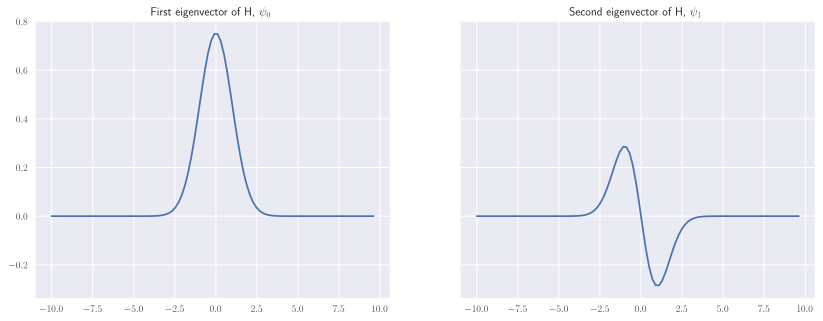

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
x = X.diagonal()

ax1.plot(x, eigenvectors[:, 0])
ax2.plot(x, eigenvectors[:, 1])
ax1.set_title('First eigenvector of $\mathsf{H}$, $\psi_0$')
ax2.set_title('Second eigenvector of $\mathsf{H}$, $\psi_1$')

plt.show()

## Evolve The Wave Function

Now we need to show an animation of the evolving wave function using (4) from time $t=0$ to $t=4\pi / \omega$.
We will take $\Psi(0)$ to be
$$
    \Psi(0) = \frac{\psi_0 + \psi_1}{\sqrt{2}}
$$
Note for the exp approximation to hold, the time steps should be at least $N_2=100$.

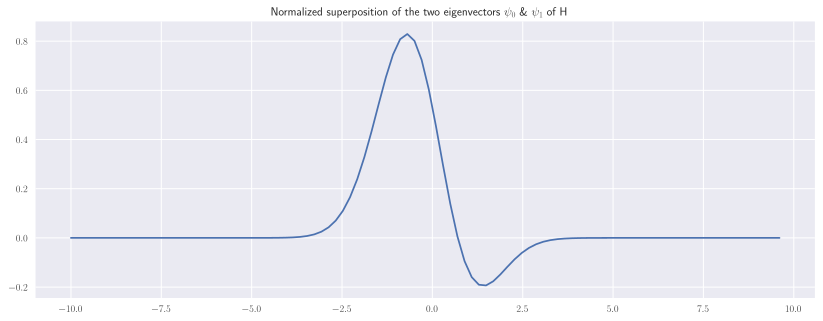

In [24]:
# Taking this if time equals 0
Psi0 = (eigenvectors[:, 0]/np.sqrt(dx) + eigenvectors[:, 1]/np.sqrt(dx)) / np.sqrt(2)

plt.plot(x, Psi0)
plt.title('Normalized superposition of the two eigenvectors $\psi_0$ \& $\psi_1$ of $\mathsf{H}$')
plt.show()

### Construct $\mathsf{U}$
From (3) we build the following

In [26]:
Nt = 100
dt = 4 * np.pi / omega / Nt

# The denominator in Cayley’s form
U_plus = np.identity(Nx) + 0.5j * H * dt
# The numerator in Cayley’s form
U_minus = np.identity(Nx) - 0.5j * H * dt

### Solve TDSE with Exact Solution
Now we solve numerically the time-dependent Schrödinger equation, that is solving the matrix equation in (4):
$$
    \tag{4}
    \left( 1 + \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t+\Delta{t}) = 
        \left( 1 - \frac{1}{2} i \frac{\Delta{t}}{\hbar} \mathsf{H} \right) \vec{\Psi}(t)
$$
We imagine it as in the form of
$$
    \mathsf{M} \vec{x} = \vec{b}
$$

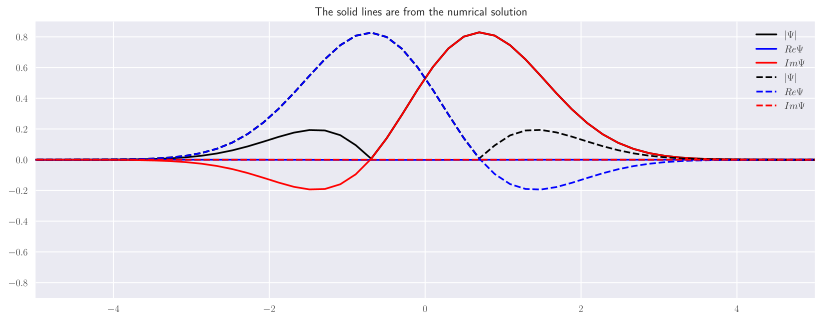

In [28]:
def normalize(vec):
    return vec / np.linalg.norm(vec)

def psi(n, x):
    # The harmonic osillator wavefunction
    return (
        (m * omega / np.pi / hbar) ** 0.25
        * (1 / np.sqrt(2**n * np.prod(np.arange(1, n + 1))))
        * hermite(n)(np.sqrt(m * omega / hbar) * x)
        * np.exp(-0.5 * ((np.sqrt(m * omega / hbar) * x) ** 2))
    )

def Psi(i):
    """
    the exact superposition.
    with our asumption we have to re-normalize psi.
    Minus sign is due to different sign convention in 
        numeric/analytic states
    """
    return (
        psi(0, x) * np.exp(-0.5j * omega * i * dt)
        - psi(1, x) * np.exp(-1.5j * omega * i * dt)
    ) / np.sqrt(2)

fig, ax = plt.subplots()
# numrical ones
(graph1,) = ax.plot(x, np.abs(Psi0), 'k', label=r"$|\Psi|$")
(graph2,) = ax.plot(x, np.real(Psi0), 'b', label=r"$Re{\Psi}$")
(graph3,) = ax.plot(x, np.imag(Psi0), 'r', label=r"$Im{\Psi}$")
# exact ones
(graph4,) = ax.plot(x, np.abs(Psi(0)), 'k--', label=r"$|\Psi|$")
(graph5,) = ax.plot(x, np.real(Psi(0)), 'b--', label=r"$Re{\Psi}$")
(graph6,) = ax.plot(x, np.imag(Psi(0)), 'r--', label=r"$Im{\Psi}$")
ax.set_title('The solid lines are from the numrical solution')
ax.set_ylim([-0.9, 0.9])
ax.set_xlim([-5, 5])
ax.legend()

# a list of soltion of psi(t)
psi_solutions = [Psi0]

def update(i):
    # solve the linear matrix eq
    b = U_minus @ psi_solutions[i]
    psi_solutions.append(solve(U_plus, b))

    graph1.set_ydata(np.abs(psi_solutions[-1]))
    graph2.set_ydata(np.real(psi_solutions[-1]))
    graph3.set_ydata(np.imag(psi_solutions[-1]))
    # we have plotted Psi at t = 0
    new_Psi = Psi(i+1)
    graph4.set_ydata(np.abs(new_Psi))
    graph5.set_ydata(np.real(new_Psi))
    graph6.set_ydata(np.imag(new_Psi))

    return graph1, graph2, graph3, graph4, graph5, graph6

animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save("evolve_exact.mp4", fps=200, dpi=150)

## Time-Dependent Hamiltonian
Now we need to use the above techneuqes to observe the time evolving of time-dependent Schrödinger equation and where the Hamiltonian *does* depend on time.  Instead of (4), we will use the following and evaluating $\mathsf{H}$ at the midpoint of each time step
$$
    \left[ 1+ \frac{1}{2}i \frac{\Delta{t}}{\hbar} \mathsf{H}\left( t + \frac{\Delta{t}}{2} \right) \right]
        \vec{\Psi}(t+ \Delta{t}) = 
    \left[ 1- \frac{1}{2}i \frac{\Delta{t}}{\hbar} \mathsf{H}\left( t + \frac{\Delta{t}}{2} \right) \right]
        \vec{\Psi}(t) 
$$

Consider the driving harmonic oscillator
$$
    f(t) = A \sin{(\Omega t)}
$$
where $A=1$ is a constant with units of length and $\Omega$ is the driving frequency.

In [185]:
# The driving frequency value
Omega = omega / 5
Nt = 1000
dt = 2 * np.pi / Omega / Nt
A = 1


def f(t):
    """driving harmonic function"""
    return A * np.sin(Omega * t)


def xc(t):
    return omega * quad(lambda tp: f(tp) * np.sin(omega * (t - tp)), 0, t)[0]


def Psi(n, x, t):
    """The time-dependent nth state."""
    exp = np.exp(
        1j
        / hbar
        * (
            -hbar * omega * t * (n + 0.5)
            + m * derivative(xc, t, dx=1e-6) * (x - xc(t) / 2)
            + m * omega**2 / 2 * quad(lambda tp: f(tp) * xc(tp), 0, t)[0]
        )
    )
    return psi(n, x - xc(t)) * exp


def H(t):
    """The time-dep Hamiltonian"""
    return (
        -0.5 * hbar**2 / m * D2
        + 0.5 * m * omega**2 * X**2
        - m * omega**2 * f(t) * X
    )


def U_plus(t):
    """The numerator in Cayley’s form"""
    return np.identity(Nx) + 1j * dt / 2 * H(t + dt / 2)


def U_minus(t):
    """The denominator in Cayley’s form"""
    return np.identity(Nx) - 1j * dt / 2 * H(t + dt / 2)


# diagonal elements of H(0)
d = H(0).diagonal(0)
# above-diagonal elements of H(0)
e = H(0).diagonal(1)

# Find the eigenvalues and eigenvectors of H at t = 0
eigenvalues, eigenvectors = eigh_tridiagonal(
    d, e, select="i", select_range=(0, 1)
)


#### $\Omega = 5\omega$

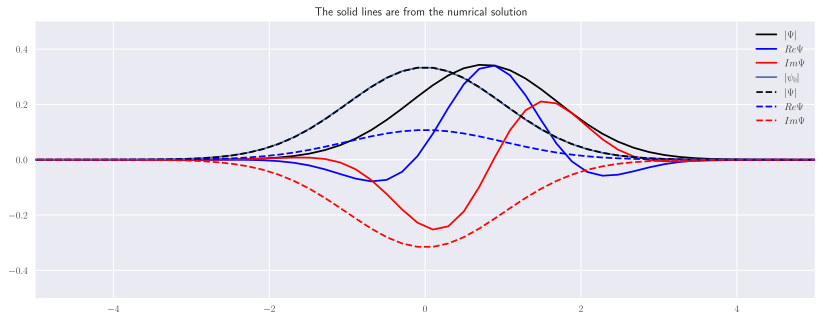

In [188]:
# The wavefunction of H at t = 0
Psi0 = eigenvectors[:, 0]
# t = np.linspace(0, 2 * np.pi / Omega, Nt)

fig, ax = plt.subplots()
# numrical ones
(graph1,) = ax.plot(x, np.abs(Psi0), "k", label=r"$|\Psi|$")
(graph2,) = ax.plot(x, np.real(Psi0), "b", label=r"$Re{\Psi}$")
(graph3,) = ax.plot(x, np.imag(Psi0), "r", label=r"$Im{\Psi}$")
# instantaneous ground state
(graph4,) = ax.plot(
    x, np.abs(normalize(psi(0, x - f(0)))), label=r"$|\psi_0|$"
)
# exact ones at t = 0
(graph5,) = ax.plot(x, np.abs(Psi(0, x, 0)), "k--", label=r"$|\Psi|$")
(graph6,) = ax.plot(x, np.real(Psi(0, x, 0)), "b--", label=r"$Re{\Psi}$")
(graph7,) = ax.plot(x, np.imag(Psi(0, x, 0)), "r--", label=r"$Im{\Psi}$")
ax.set_title("The solid lines are from the numrical solution")
ax.set_ylim([-.5, .5])
ax.set_xlim([-5, 5])
ax.legend()

# a list of soltion of psi(t)
psi_solutions = [Psi0]


def update(i):
    # solve the linear matrix eq
    b = U_minus(i * dt) @ psi_solutions[i]
    psi_solutions.append(solve(U_plus(i * dt), b))

    graph1.set_ydata(np.abs(psi_solutions[-1]))
    graph2.set_ydata(np.real(psi_solutions[-1]))
    graph3.set_ydata(np.imag(psi_solutions[-1]))
    graph4.set_ydata(normalize(psi(0, x - f(i * dt))))
    # we have plotted Psi at t = 0
    new_Psi = normalize(Psi(0, x, (i + 1) * dt))
    graph5.set_ydata(np.abs(new_Psi))
    graph6.set_ydata(np.real(new_Psi))
    graph7.set_ydata(np.imag(new_Psi))

    return graph1, graph2, graph3, graph4, graph5, graph6, graph7


animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save(f"driven_evolve_a.mp4", fps=300, dpi=150)

With driving frequency value of $\Omega = \omega / 5$, the numerical solution is very close to the instantaneous ground state. Meaning that, this is an adiabatic process.

#### $\Omega = 5\omega$

In [189]:
Omega = 5 * omega
animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save(f"driven_evolve_b.mp4", fps=300, dpi=150)

#### $\Omega = 6 \omega /5$

In [190]:
Omega = 6/5 * omega
animation = FuncAnimation(
    fig,
    update,
    frames=Nt,
    blit=True,
)
animation.save(f"driven_evolve_c.mp4", fps=300, dpi=150)